# EBRAINS computational services and HBP

- Ebrains https://ebrains.eu/ and the The Human Brain Project https://www.humanbrainproject.eu/en/
- In particular, see https://ebrains.eu/service/nest-simulator/

- Simulation and Emulation 

- BrainScaleS and SpiNNaker https://ebrains.eu/service/neuromorphic-computing/
    

# Info about NEST

<img align="center"        
 src="./extra/nest-simulated.png" width="300" height="300" />

- comparison among SpiNNaker and NEST with HPC https://www.frontiersin.org/articles/10.3389/fnins.2018.00291/full

- NEST is a simulator for spiking neural network models that focuses on the dynamics, size and structure of neural systems

- No exact morphology of individual neurons, but point-models, mono-compartment models


- It's good for networks of any size, including models of information processing 
    - (e.g. in the visual or auditory cortex of mammals)
    
    
- it's good for models of network activity dynamics 
    - (e.g. laminar cortical networks or balanced random networks) 
    
    
- it's good for  models of learning and plasticity
    - (e.g., short and long term plasticity)
    
    
- NEST is openly available for download https://www.nest-simulator.org/

- ideas behind NEST, interview with Prof. Dr. Hans Ekkehard Plesser https://www.youtube.com/watch?reload=9&v=ARG0hzJea1s

- NEST Conference June 28/29 (DL 16 May) https://hifis-events.hzdr.de/event/41/

- if you want to install NEST, visit https://nest-simulator.readthedocs.io/en/stable/installation/index.html

# Info about PyNN 

![](https://neuralensemble.org/static/photos/pynn_logo.png)

- A Python package for simulator-independent specification of neuronal network models

- PyNN works with multiple simulators (SpiNNaker, NEST, Brain, Neuron, etc)

- If you want to install install PyNN on your local machine, see info http://neuralensemble.org/docs/PyNN/installation.html

- Paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2634533/

- PyNN website http://neuralensemble.org/docs/PyNN/index.html

- PyNN mailing list https://groups.google.com/g/neuralensemble



# Goal of this tutorial on PyNN

- Learn code elements to run a Spiking Neural Networks (SNNs) by using PyNN and NEST simulator
- Computational Neuroscience and Theoretical Neuroscience


## knowledge assumptions: 

- basis of spiking neural network theory (https://neuronaldynamics.epfl.ch/online/index.html)
- familiarity with physical quatities related to electric circuits (e.g., voltages, conductances, currents, capacitances, etc)
- basic python coding (numpy, work with dictionaries, some matplotlib tools, etc)

# Content:

## network building and running
1. neurons
    - cell types
    - populations
    - recording variables
    
    
2. connections
    - synapse types
    - connections types
    - projections


3. simulation managing
    - computational settings
    - save and load outputs
    - visualization tools

## network examples
- [1D entry network](eg_1D_entry-network.ipynb)
- [1D decaying network](eg_1D_decaying-network.ipynb)
- [1D diverging network](eg_1D_diverging-network.ipynb)
- [1D small-world network](eg_1D_small-world-network.ipynb)
- [1D testing cell models network](eg_1D_testing-cell-models-network.ipynb)
- [1D testing STDP model network](eg_1D_testing-STDP-model-network.ipynb)

    
## topics for an advanced class
- bio-realistic neural network 
- large scale computation (i.e., the size)
- model replication (i.e., reproduce results from paper)
- parameters explorations (i.e., optimization algs)
- running parallel simulations (already managed by SpiNNaker, but for NEST or Neuron see http://neuralensemble.org/docs/PyNN/parallel.html) 

## expected take-home-points:

0. import the simulator
1. setup the simulator
2. decide the cell types 
3. design the populations
4. define the synapse types
5. select the connection algorithm
6. make the projections 
7. idealize the stimulus
8. run the simulation
9. save the results
10. recover the results
11. postprocessing (visualization or statistics, etc)
12. close the simulations

# step0: import the simulator

In [1]:
import pyNN.nest as sim # set accordly also the kernel in the notebook
from pyNN import space 

import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt


# note that if you use nest, import pyNN.nest as sim (see http://neuralensemble.org/docs/PyNN/backends.html)

/home/alberto-int/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'pynestkernel' does not match runtime version 3.7
  return f(*args, **kwds)


CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/home/alberto-int/anaconda3/lib/python3.7/site-packages/PyNN-0.9.5-py3.7.egg/pyNN/nest/__init__.py:53: UserWarning:Unable to install NEST extensions. Certain models may not be available.


In [2]:
# sim + tab key to explore PyNN features (classes, modules, functions, instances)

# have a try...

# step1: setup the simulator

In [3]:
sim.setup(
    timestep=1, # [ms]
    min_delay=1, # [ms]
    max_delay=100) # [ms] # not that the max_delay supported by SpiNNaker is timestep * 144

simtime = 200 #ms

/usr/lib/python3.5/dist-packages/nest/lib/hl_api_helper.py:127: UserWarning:
ResetNetwork is deprecated and will be removed in NEST 3.0.


# step2: the cell types 

- cell models and source models
- point neuron (mono-compartment model)
- http://neuralensemble.org/docs/PyNN/standardmodels.html

In [4]:
sim.list_standard_models()

NEST does not allow setting an initial value for isyn_exc
NEST does not allow setting an initial value for isyn_inh
NEST does not allow setting an initial value for isyn_exc
NEST does not allow setting an initial value for isyn_inh
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_r
NEST does not allow setting an initial value for g_s
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for E_sfa
NEST does not allow setting an initial value for I_stc
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


['IF_curr_alpha',
 'IF_curr_exp',
 'IF_cond_alpha',
 'IF_cond_exp',
 'IF_cond_exp_gsfa_grr',
 'IF_facets_hardware1',
 'HH_cond_exp',
 'EIF_cond_alpha_isfa_ista',
 'SpikeSourcePoisson',
 'SpikeSourcePoissonRefractory',
 'SpikeSourceGamma',
 'SpikeSourceArray',
 'EIF_cond_exp_isfa_ista',
 'Izhikevich',
 'GIF_cond_exp']

# example with sim.IF_cond_exp 

- Leaky integrate and fire model with fixed threshold and decaying-exponential post-synaptic conductance.
- explicit model https://arxiv.org/pdf/2003.13365.pdf

In [5]:
# parameter names

sim.IF_cond_exp.get_parameter_names()

['v_rest',
 'cm',
 'tau_m',
 'tau_refrac',
 'tau_syn_E',
 'tau_syn_I',
 'e_rev_E',
 'e_rev_I',
 'v_thresh',
 'v_reset',
 'i_offset']

In [6]:
# default parameters

standard_pars = sim.IF_cond_exp.default_parameters

standard_pars

# see parameters of the models http://neuralensemble.org/docs/PyNN/standardmodels.html

{'v_rest': -65.0,
 'cm': 1.0,
 'tau_m': 20.0,
 'tau_refrac': 0.1,
 'tau_syn_E': 5.0,
 'tau_syn_I': 5.0,
 'e_rev_E': 0.0,
 'e_rev_I': -70.0,
 'v_thresh': -50.0,
 'v_reset': -65.0,
 'i_offset': 0.0}

In [7]:
# define your own pars, dictonary of testing parameters

testing_pars = {'tau_m': 20, 
                'cm': 1.0, 
                'v_rest': -65.0, 
                'v_reset': -70.0, 
                'v_thresh': -48.0, 
                'tau_syn_E': 5.0, 
                'tau_syn_I': 5.0, 
                'tau_refrac': 2, 
                'i_offset': 0.0, 
                'e_rev_E': 0.0, 
                'e_rev_I': -70.0}

In [8]:
# initial values

sim.IF_cond_exp().default_initial_values

{'v': -65.0, 'gsyn_exc': 0.0, 'gsyn_inh': 0.0}

# step3: making cell populations


In [9]:
# define dictionaries

pops = {}
n_cells = {}
neuron_Model = {}
neuron_ModelPars = {}
initial_Values = {}

In [10]:
# define a popolation of excitatory neurons in 1D

popName = 'Exc'
n_cells[popName] = 100
neuron_Model[popName] = sim.IF_cond_exp
neuron_ModelPars[popName] = sim.IF_cond_exp.default_parameters # or standard_pars or testing_pars
initial_Values[popName] = sim.IF_cond_exp.default_initial_values

pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               neuron_ModelPars[popName],
                               structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0), 
                               label = popName)

pops[popName].record(['spikes','v','gsyn_exc','gsyn_inh'])   

pops

NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


{'Exc': Population(100, IF_cond_exp(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='Exc')}

In [11]:
# define a popolation of inhibitory neurons in 1D

popName = 'Inh'
n_cells[popName] = 100
neuron_Model[popName] = sim.IF_cond_exp
neuron_ModelPars[popName] = sim.IF_cond_exp.default_parameters # or standard_pars or testing_pars
initial_Values[popName] = sim.IF_cond_exp.default_initial_values

pops[popName] = sim.Population(n_cells[popName], 
                              neuron_Model[popName],
                              neuron_ModelPars[popName],
                              structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                              label = popName)

pops[popName].record(['spikes','v','gsyn_exc','gsyn_inh'])

pops

NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


{'Exc': Population(100, IF_cond_exp(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='Exc'),
 'Inh': Population(100, IF_cond_exp(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='Inh')}

In [12]:
# eventually defined random subsets of cells from the the population 

pops['A'] = pops[popName].sample(750) 
pops['B'] = pops[popName].sample(250) 

pops['A'].record(['spikes','v','gsyn_exc','gsyn_inh'])
pops['B'].record(['spikes','v','gsyn_exc','gsyn_inh'])

In [13]:
# some info to define network with 2D or 3D structures

structure = {}

structure['1D'] = space.Line(
                              dx=1.0, 
                              x0=0.0, 
                              y=0.0, 
                              z=0.0),

structure['2D'] = space.Grid2D(
                                aspect_ratio=1.0,
                                dx=1.0,
                                dy=1.0,
                                x0=0.0,
                                y0=0.0,
                                z=0,
                                fill_order='sequential', #'random'
                                rng=None,
                                )

structure['3D'] = space.Grid3D(
                                aspect_ratioXY=1.0,
                                aspect_ratioXZ=1.0,
                                dx=1.0,
                                dy=1.0,
                                dz=1.0,
                                x0=0.0,
                                y0=0.0,
                                z0=0,
                                fill_order='sequential', # 'random'
                                rng=None,
                                )

structure['Sphere'] = space.RandomStructure(
                                            boundary=space.Sphere(radius=100), 
                                            origin=(0.0, 0.0, 0.0), 
                                            rng=None)


structure['Cuboid'] = space.RandomStructure(
                                            boundary=space.Cuboid(
                                                                width=10, 
                                                                height=10, 
                                                                depth=10), 
                                                                origin=(0.0, 0.0, 0.0), 
                                                                rng=None)


# to explore the actual position of the cells:
structure['2D'].generate_positions(2**2), structure['3D'].generate_positions(2**3)

(array([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 0., 0., 1., 1.],
        [0., 1., 0., 1., 0., 1., 0., 1.]]))

In [14]:
# get initial values

pops['Exc'].initial_values

{'v': <larray: base_value=-65.0 shape=(100,) dtype=<class 'float'>, operations=[]>,
 'gsyn_exc': <larray: base_value=0.0 shape=(100,) dtype=<class 'float'>, operations=[]>,
 'gsyn_inh': <larray: base_value=0.0 shape=(100,) dtype=<class 'float'>, operations=[]>}

In [15]:
pops['Exc'].initial_values['v']

<larray: base_value=-65.0 shape=(100,) dtype=<class 'float'>, operations=[]>

In [16]:
pops['Exc'].initial_values['gsyn_exc']

<larray: base_value=0.0 shape=(100,) dtype=<class 'float'>, operations=[]>

In [17]:
pops['Exc'].initial_values['gsyn_inh']

<larray: base_value=0.0 shape=(100,) dtype=<class 'float'>, operations=[]>

In [18]:
# change initial values, e.g., voltage

pops['Exc'].initialize(v = np.random.normal(loc=-65.0, scale=2.0))


# step4: synapses types (to use with the sim.Projection costructor)

In [19]:
# static synapse weight and delay

weights = np.random.normal(loc=0.04, scale=0.01)
static_synapse = sim.StaticSynapse(weight=weights, delay=0.5) # weights in [uS] and delay in [ms]

# note1: if you use a model with current based synapses, the weights are in nA, otherewise are uS for conductance based synapses models 


In [20]:
# short term synaptic plasticity, depression and facilitation

w = np.random.normal(loc=0.04, scale=0.01)
depressing_synapse = sim.TsodyksMarkramSynapse(weight=w, # uS or nA
                                               delay=0.2, # ms
                                               U=0.5, # use parameter
                                               tau_rec=800.0, # depression time const # ms
                                               tau_facil=0.0) # facil time const # ms

tau_rec = np.random.normal(loc=100.0, scale=10.0)
facilitating_synapse = sim.TsodyksMarkramSynapse(weight=w, delay=0.5, U=0.04,
                                             tau_rec=tau_rec)


# https://www.jneurosci.org/content/20/1/RC50.long
# http://neuralensemble.org/docs/PyNN/reference/plasticitymodels.html

In [21]:
# long term / spike-timinig-dependend plasticity (STDP), i.e. learning

stdp_synapse = sim.STDPMechanism(
                                 timing_dependence=sim.SpikePairRule(tau_plus=20.0, tau_minus=20.0, A_plus=0.1, A_minus=0.1),
                                 weight_dependence=sim.AdditiveWeightDependence(w_min=0.0, w_max=1.0),
                                 voltage_dependence=None,
                                 dendritic_delay_fraction=1.0,
                                 weight = 0.05, # initial value
                                 delay = "0.5 + 0.01*d", # distance based delay min_delay + f(distance)
                                 )
# see for details http://neuralensemble.org/docs/PyNN/connections.html#synapse-types

- have a look to [1D testing STDP model network](eg_1D_testing-STDP-model-network.ipynb)

# step5: connectors types (to use with the sim.Projection costructor)


In [22]:
# all to all connections

connector = sim.AllToAllConnector(allow_self_connections=True) # autapses=True

In [23]:
# all to all connections with probability

prob = 0.25 # point prob
prob = np.random.normal(loc=0.5, scale=0.1) # distribution of prob
connector = sim.FixedProbabilityConnector(p_connect=prob)

In [24]:
# distance based probability connections

d_rule = "exp(-d)" # or d_expression = "d<5"
connector = sim.DistanceDependentProbabilityConnector(d_expression=d_rule)

In [25]:
# one to one connections

connector = sim.OneToOneConnector()

In [26]:
# fixed number of pre synptic neurons randomly taken (from j to i) link to all pre syn neurons

connector = sim.FixedNumberPreConnector(n = 50, allow_self_connections=True)

In [27]:
# fixed number of post synptic neurons randomly taken (from i to j) link to all post syn neurons

connector = sim.FixedNumberPostConnector(n = 50, allow_self_connections=True)

In [28]:
# small-world connections

do_run = False
if do_run:
    connector = sim.SmallWorldConnector(
                                    degree, # the region length where nodes will be connected locally.
                                    rewiring, # the probability of rewiring each edge.
                                    allow_self_connections=True,
                                    safe=True,
                                    verbose=False,
                                    n_connections=None, # if specified, the number of efferent synaptic connections per neuron.
                                    )


see example [1D small-world network](eg_1D_small-world-network.ipynb)


In [29]:
# CSA Connection Set Algebra costructor ( Djurfeldt 2012 https://pubmed.ncbi.nlm.nih.gov/22437992/)

do_run = False
if do_run:
    #cset = a connection set object
    connector = CSAConnector(cset, safe=True, callback=None)


In [30]:
# from file to connector, i.e., [i, j, weight, delay]

do_run = False
if do_run:
    file = 'yourFile.txt'
    connector = sim.FromFileConnector(
                                    file,
                                    distributed=False,
                                    safe=True,
                                    callback=None,
                                    verbose=False,
                                )

In [31]:
# list based connections, i.e., [i, j, weight, delay]

# one-to-one like list
#            [i, j,  w,   d]
givenList = [[0, 0, 0.08, 1],
             [1, 1, 0.08, 1],
             [2, 2, 0.08, 1],
             [3, 3, 0.08, 1],
             [4, 4, 0.08, 1]]
             #...

connector = sim.FromListConnector(conn_list=givenList)

# powerful tool to draw your own connectivity

## Example of a function to compute a list for the FromListConnector

## e.g., list of Distance based Probability Connections with Distance based Delay (DPCDD)

In [32]:
def compute_DPCDD(n_cells_i, n_cells_j, weights, d_thresh, p_thresh, width): 
    v_c = 0.35 #m/s
    d0 = 1 #ms
    scale = 1
    
    connections = {}
    probabilities = {}
    distances = {}

    connections = []
    probabilities = []
    distances = []
    for pre in range(n_cells_i):
        for post in range(n_cells_j):
            d_ij = np.sqrt((pre - post)**2)
            delay = d0 + d_ij / v_c
            if d_ij > d_thresh: 
                distances.append(d_ij)
                p_ij = scale*np.exp(-0.5 * (d_ij**2/width**2))
                probabilities.append(p_ij)

                if p_ij > p_thresh:
                    connections.append([pre, post, weights, delay])#, [d_ij, p_ij]])

    return connections, distances, probabilities

## operative example: center-surround connections 

In [33]:
# -> see https://link.springer.com/referenceworkentry/10.1007%2F978-1-4614-6675-8_569)
# -> see http://www.scholarpedia.org/article/Neural_inhibition

In [34]:
# define parameters

n_cell = {'excitatory': 100, 'inhibitory': 100}
weights = {'excitatory': 0.008, 'inhibitory': 0.008}
d_thresh = {'excitatory': 0, 'inhibitory': 2} 
p_thresh = {'excitatory': 0.1, 'inhibitory': 0.1}
width = {'excitatory': 1, 'inhibitory': 3}

# ex. look particular cases of one-to-one, all-to-all

In [35]:
connections = {}
distances = {}
probabilities = {}

for synapse_type in ['excitatory', 'inhibitory']:
    connections[synapse_type], distances[synapse_type], probabilities[synapse_type] = compute_DPCDD(
                                                                                                    n_cell[synapse_type], 
                                                                                                    n_cell[synapse_type], 
                                                                                                    weights[synapse_type], 
                                                                                                    d_thresh[synapse_type], 
                                                                                                    p_thresh[synapse_type],
                                                                                                    width[synapse_type])

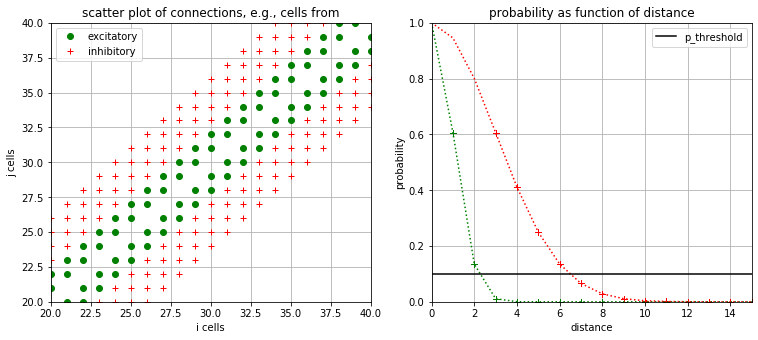

In [36]:
# visual check
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(11,5))
fig.tight_layout(pad=3)
axes_list = fig.axes

axes_list[0].plot(np.asarray(connections['excitatory']).T[0], np.asarray(connections['excitatory']).T[1],'go', label='excitatory')
axes_list[0].plot(np.asarray(connections['inhibitory']).T[0], np.asarray(connections['inhibitory']).T[1],'r+', label='inhibitory')
axes_list[0].grid()
axes_list[0].legend()
axes_list[0].set_title('scatter plot of connections, e.g., cells from')
axes_list[0].set_xlabel('i cells')
axes_list[0].set_ylabel('j cells')
axes_list[0].set_xlim(20,40)
axes_list[0].set_ylim(20,40)


axes_list[1].plot(distances['excitatory'],probabilities['excitatory'],'g+')
axes_list[1].plot(distances['inhibitory'],probabilities['inhibitory'],'r+') 
axes_list[1].plot(np.arange(0, 50), 1*np.exp(-0.5 * (np.arange(0, 50)**2/width['excitatory']**2)), 'g:')
axes_list[1].plot(np.arange(0, 50), 1*np.exp(-0.5 * (np.arange(0, 50)**2/width['inhibitory']**2)), 'r:')
axes_list[1].grid()
axes_list[1].set_xlim(0,15)
axes_list[1].set_ylim(0,1)
axes_list[1].axhline(p_thresh['excitatory'], color='k', label='p_threshold', )
axes_list[1].set_title('probability as function of distance')
axes_list[1].set_xlabel('distance')
axes_list[1].set_ylabel('probability')
axes_list[1].legend()

#fig.show()

# Plots show connections with 2 cells local excitation and 4 cells surrounding inhibition, no autapses

# step6: designing projections

In [37]:
# compute manual list of connections to have the 2-4 center-surround structure

weight = {('Exc', 'Exc') : 0.08,
          ('Exc', 'Inh') : 0.08,
          ('Inh', 'Exc') : 0.24
          }

d_thresh = {('Exc', 'Exc'): 0, 
            ('Inh', 'Exc'): 2} 

p_thresh = {('Exc', 'Exc'): 0.1, 
            ('Inh', 'Exc'): 0.1}

width = {('Exc', 'Exc'): 1, 
         ('Inh', 'Exc'): 3}



connections = {}
distances = {}
probabilities = {}

connections['Exc', 'Exc'], distances['Exc', 'Exc'], probabilities['Exc', 'Exc'] = compute_DPCDD(n_cells['Exc'], 
                                                                                                      n_cells['Exc'], 
                                                                                                      weight['Exc', 'Exc'], 
                                                                                                      d_thresh['Exc', 'Exc'], 
                                                                                                      p_thresh['Exc', 'Exc'], 
                                                                                                      width['Exc', 'Exc'])

connections['Inh', 'Exc'], distances['Inh', 'Exc'], probabilities['Inh', 'Exc'] = compute_DPCDD(n_cells['Inh'], 
                                                                                                      n_cells['Exc'], 
                                                                                                      weight['Inh', 'Exc'], 
                                                                                                      d_thresh['Inh', 'Exc'], 
                                                                                                      p_thresh['Inh', 'Exc'], 
                                                                                                      width['Inh', 'Exc'])

In [38]:
# make the projections (costructor links within and between populations)

proj = {}



proj['Exc', 'Exc'] = sim.Projection(pops['Exc'], 
                                    pops['Exc'],
                                    connector = sim.FromListConnector(connections['Exc', 'Exc']),
                                    receptor_type = 'excitatory',
                                    space = space.Space(axes = 'x'),
                                    label = 'exc-exc connections'
                                    )

proj['Exc', 'Inh'] = sim.Projection(pops['Exc'], pops['Inh'],
                                    connector = sim.OneToOneConnector(), 
                                    synapse_type = sim.StaticSynapse(weight=weight['Exc', 'Inh'], delay=1), 
                                    receptor_type = 'excitatory',
                                    space = space.Space(axes = 'x'),
                                    label = 'exc-inh connections'
                                    )


proj['Inh', 'Exc'] = sim.Projection(pops['Inh'], pops['Exc'],
                                    connector = sim.FromListConnector(connections['Inh', 'Exc']),
                                    receptor_type = 'inhibitory',
                                    space = space.Space(axes = 'x'),
                                    label = 'inh-exc connections'
                                    )

# note that using the FromListConnector is not necessary set the synapse weights and delays because are already define inside
# they have to be defined with other constructors (OneToOne, AllToAll, etc)

In [39]:
# note for the the space arg with 2 or 3 dimensions

s = {}
s['1D'] = space.Space(axes = 'x')
s['2D'] = space.Space(axes = 'xy')
s['3D'] = space.Space(axes = 'xyz')
s['Sphere'] = space.Space(axes = 'xyz')
s['Cuboid'] = space.Space(axes = 'xyz')


# step7: setting the stimulus, i.e., spike sources or current injection

## (thalamic) spike sources

(0, 200)

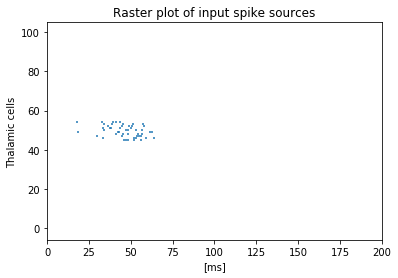

In [40]:
# define the list of spike sources, e.g, with a gaussian input around 100 [ms]

popName = 'Thalamus'  

n_cells[popName] = n_cells['Exc']
spike_times = [[]]*n_cells[popName] #list of spike lists, where one spike list is related to one spike source

random_sources_idx = [np.random.randint(n_cells[popName]*0.45, n_cells[popName]*0.55) for i in range(n_cells[popName])]

for idx, sources in enumerate(random_sources_idx):
    spike_times[sources] = np.sort([np.random.normal(loc=50, scale=10) for n in range(5)])

spike_times
%matplotlib inline
a = plt.eventplot(spike_times)
plt.xlabel('[ms]')
plt.ylabel('Thalamic cells')
plt.title('Raster plot of input spike sources')
plt.xlim(0, simtime)

#plt.show()
#spike_times

In [41]:
# define the spike sources populations and projections

neuron_Model[popName] = sim.SpikeSourceArray(spike_times=spike_times)

pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               label = popName)
                              # add spatial constraint
    
proj['Thalamus', 'Exc'] = sim.Projection(pops['Thalamus'], pops['Exc'],
               connector = sim.OneToOneConnector(),
               synapse_type = sim.StaticSynapse(weight=0.08, delay=1),
               receptor_type = 'excitatory',
                #space=<pyNN.space.Space object at 0x7ff8f25a2110>,
               label = 'thalamus-exc connections'
                )


In [42]:
# otherwise define a spike sources from poisson process

do_run = False

if do_run:
    neuron_Model[popName] = sim.SpikeSourcePoisson(
                            rate=50.0, # [Hz]
                            start=100, 
                            duration=None)

    pops[popName] = sim.Population(n_cells[popName], 
                                   neuron_Model[popName],
                                   label = popName)
                                  # add spatial constraint

    proj['Thalamus', 'Exc'] = sim.Projection(pops['Thalamus'], pops['Exc'],
                   connector = sim.OneToOneConnector(),
                   synapse_type = sim.StaticSynapse(weight=0.08, delay=1),
                   receptor_type = 'excitatory',
                    #space=<pyNN.space.Space object at 0x7ff8f25a2110>,
                   label = 'thalamus-exc connections'
                    )


## injecting current

In [43]:
# DC, AC, Noise current [nA]

do_run = False

if do_run:
    
    # DC
    pulse = DCSource(amplitude=0.5, 
                     start=20.0, 
                     stop=80.0)
    pulse.inject_into(pops['Exc'])
    
    # AC
    sine = ACSource(start=50.0, 
                    stop=450.0, 
                    amplitude=1.0, 
                    offset=1.0,
                    frequency=10.0, 
                    phase=180.0)
    pops['Exc'].inject(sine)
    
    # noisy current
    noise = NoisyCurrentSource(mean=1.5, 
                               stdev=1.0, 
                               start=50.0, 
                               stop=450.0, 
                               dt=1.0)
    pops['Exc'].inject(noise)

# step8: run simulation

In [44]:
sim.run(simtime) # time_bins=500 [ms]

# breif recap, what we are going to run:
# - network with two pops of exc and inh neurons
# - the connectivity is center-surround (exc-inh)
# - the stimulus is a random sequence of spikes

# wait some minuts...

200.0

# step9: save results

In [45]:
outputs = {}

for layer in ['Exc', 'Inh']:
    
    # save on the notebook space
    outputs[layer] = pops[layer].get_data()
    
    #save in the folder
    for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
        pops[layer].write_data(str(layer) + '_' + str(recording) + '.pkl')
        

# step10: recover results

In [46]:
def recover_results(outputs):
    results = {}
    for key in outputs.keys(): # to extract the name of the layer, e.g., Exc, Inh, Thalamus, etc  
        
        # to get voltage and conductances
        for analogsignal in outputs[key].segments[0].analogsignals:
            #print(analogsignal.name)
            results[key, analogsignal.name] = analogsignal

        # to get spikes
        results[key, 'spikes'] = outputs[key].segments[0].spiketrains
    return results

In [47]:
# check results
results = recover_results(outputs)
results.keys()


dict_keys([('Exc', 'gsyn_inh'), ('Exc', 'gsyn_exc'), ('Exc', 'v'), ('Exc', 'spikes'), ('Inh', 'gsyn_inh'), ('Inh', 'gsyn_exc'), ('Inh', 'v'), ('Inh', 'spikes')])

# step11: postprocessing (looking the results)

In [48]:
# eventually import pkl files

do_run = False

if do_run:
    import pickle
    
    # e.g., 
    with open('Exc_v.pkl', 'rb') as f:
            data = pickle.load(f)


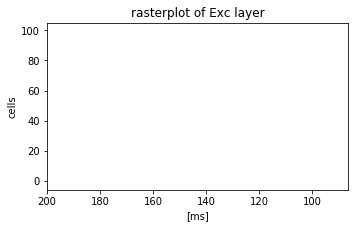

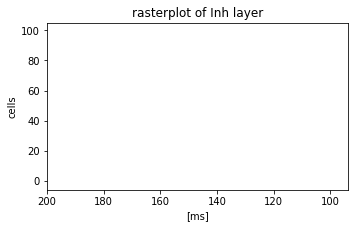

In [49]:
# check the spikes

%matplotlib inline

fig, axes = plt.subplots(1, 1)
fig.tight_layout(pad=5)
axes_list = fig.axes

for idx, value in enumerate(['Exc']):
    axes_list[idx].eventplot(results[value, 'spikes'])
    axes_list[idx].eventplot(spike_times, color='r')
    axes_list[idx].set_title('rasterplot of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('[ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(simtime)
    #axes_list[idx].legend()

#fig.show()
    
fig, axes = plt.subplots(1, 1)
fig.tight_layout(pad=5)
axes_list = fig.axes

for idx, value in enumerate(['Inh']):
    axes_list[idx].eventplot(results[value, 'spikes'])
    axes_list[idx].eventplot(spike_times, color='r')
    axes_list[idx].set_title('rasterplot of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('[ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(simtime)


#fig.show()  

# in red the spikes from the sources

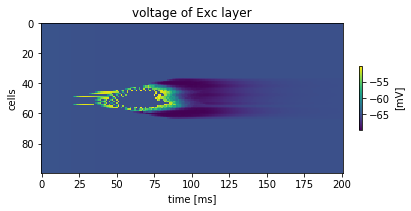

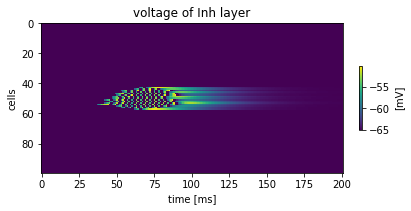

In [50]:
# check the voltage

%matplotlib inline

fig, axes = plt.subplots(1, 1)#, sharex=True)
fig.tight_layout(pad=4)
axes_list = fig.axes
for idx, value in enumerate(['Exc']):
    im = axes_list[idx].imshow(results[value, 'v'].T)
    axes_list[idx].set_title('voltage of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('time [ms]')
    axes_list[idx].set_ylabel('cells')
    fig.colorbar(im, ax=axes_list[idx], fraction=0.010, label='[mV]')
#fig.show()
    
fig, axes = plt.subplots(1, 1)#, sharex=True)
fig.tight_layout(pad=4)
axes_list = fig.axes
for idx, value in enumerate(['Inh']):
    im = axes_list[idx].imshow(results[value, 'v'].T)
    axes_list[idx].set_title('voltage of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('time [ms]')
    axes_list[idx].set_ylabel('cells')
    fig.colorbar(im, ax=axes_list[idx], fraction=0.010, label='[mV]')
#fig.show()

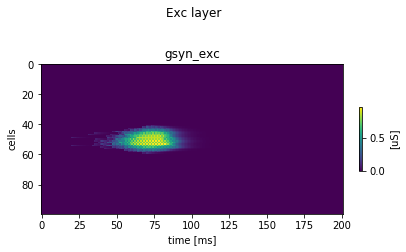

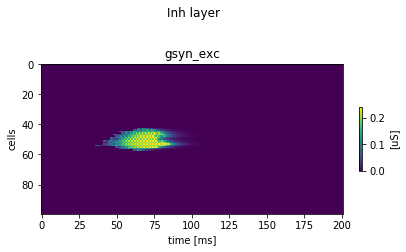

In [51]:
# check the conductances
%matplotlib inline

for layer in ['Exc', 'Inh']:
    fig, axes = plt.subplots(1, 1)#, figsize=(9,5))
    fig.tight_layout(pad=4)
    fig.suptitle(str(layer) + ' layer')
    axes_list = fig.axes
    
    for idx, gsyn in enumerate(['gsyn_exc']):#, 'gsyn_inh']):
        im = axes_list[idx].imshow(results[layer, gsyn].T)
        axes_list[idx].set_title(str(gsyn))
        axes_list[idx].set_xlabel('time [ms]')
        axes_list[idx].set_ylabel('cells')
        fig.colorbar(im, ax=axes_list[idx], fraction=0.010, label='[uS]')
    
#    fig.show()

# step12: close simulation


In [52]:
sim.end()

# learn-by-examples

- [1D entry network](eg_1D_entry-network.ipynb)
- [1D decaying network](eg_1D_decaying-network.ipynb)
- [1D diverging network](eg_1D_diverging-network.ipynb)
- [1D testing cell models network](eg_1D_testing-cell-models-network.ipynb)
- [1D testing STDP model network](eg_1D_testing-STDP-model-network.ipynb)





# learn-with-exercices

- [ex_network_A](ex_network_A.ipynb), i.e., a 1D network of 100 cells that receives a sequence of random thalamic inputs
- [ex_network_B](ex_network_B.ipynb), i.e., a 2D network of 900 excitatory cells that receives a sequence of 2D geometric thalamic inputs
- [ex_network_C](), i.e., to-be-defined

# learn-from-scretch
- create equivalent or extended PyNN functions by using numpy, e.g., specially for peculiar type of connectivities (use FromListConnector)
- create a network and check the [balance]( http://www.scholarpedia.org/article/Balance_of_excitation_and_inhibition) between excitatory and inhibitory components  (e.g. [Brette et al 2007](http://neuralensemble.org/docs/PyNN/examples/VAbenchmarks.html))
- explore boundary conditions in 1D by comparing open and close ring networks (define properly the list of connections)
- compare two populations of different cell models and observe their difference on reacting to a stimulus
- create a network to make a deep signal processing with statistics, data analysis, and exploration of the frequency domain (FFT, HHT)
- design a set of stimuli with different onset timing and shape and test them on a simple network
- take one [example](http://neuralensemble.org/docs/PyNN/examples.html) from the PyNN website made for NEST and adapt to run on SpiNNaker
- take one example from the learn-by-examples section and extend it in 2D or 3D  
- use the notebook called [eg_nD_blank_network](eg_nD_blank-network.ipynb) and start your personal simulations


